In [5]:
import sys
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm
sys.path.append('./model')

import sfc_model
import config

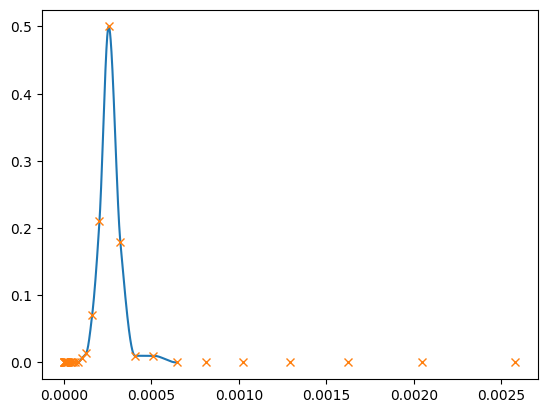

In [6]:
# define some parameters for the simulation
N_discr = 30  # discretization for outer tube
dt = 5  # time step of simulation

model_param = config.param  # parameters needed for model
MC_param = config.MC_param  # parameters needed for Monte Carlo simulation part

# generate smooth initial function from measurements for sampling
x_points = 1e-6*np.array([0, 2, 2.5, 3.2, 4, 5, 6.3, 8, 10.1, 12.7, 16, 20.2, 25.4, 32, 40.3, 50.8, 64, 80.6, 101.6, 128, 161.3, 203.2, 256, 322.5, 406.4, 512, 645.1, 812.7, 1024, 1290.2, 1625.5, 2048, 2580.3])
# cumulative
y_points = np.array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0.006, 0.02, 0.09, 0.3, 0.8, 0.98, 0.99, 1, 1, 1, 1, 1, 1, 1, 1])
n_init, domain = config.initialize_init_function(x_points, y_points)
# plot initial distribution
xx_plot = np.linspace(*domain,1001)
yy_plot = n_init(xx_plot)

plt.plot(xx_plot,yy_plot)
plt.plot(x_points[1:],y_points[1:]-y_points[:-1],'x')  # density
plt.show()

In [7]:
# overwrite default parameters
MC_param['n_init'] = n_init
MC_param['domain'] = domain

# setup model
model = sfc_model.SFCModel()
model.setup(model_param['L'], dt, N_discr, model_param, MC_param)

In [ ]:
# run simulation
n_steps = 500

# inputs
c_in = 0.19
T_PM_in = 273.15 + 50
T_TM_in = 273.15 + 50
mf_PM = 10.83/60/1000/1000*config.param['rho_PM']
mf_TM = 50/60/1000/1000*config.param['rho_TM']
Q_g = 10.83/60/1000/1000 # gas flow rate [m^3/s]
w_crystal = 0.005

for _ in tqdm(range(n_steps)):
    model.make_step(c_in, T_PM_in, T_TM_in, mf_PM, mf_TM, Q_g, w_crystal)

# plot states over length of crystallizer at end of simulation
model.plot_states_over_length()

 26%|████████████████████▊                                                           | 130/500 [00:06<00:24, 15.40it/s]